# How to analyze uncertainty? 
## Interesting salary trends on Stack Overflows survey 2020


## 1. Introduction

When you are solving what is the average salary for a developer type you’ll cross with this observation: Dataset has 23 different developer categories but this is a multiple-choice question so respondents can choose all that applies. This means for example that one respondent can have many developer types listed. There were 8269 different answer types (23 categories + 8264 different combinations of those categories). So how can you exactly tell, which salary is meant for each developer type?

Stack Overflow makes an Annual Developer Survey to their developer community. In 2020 
with nearly 65,000 responses fielded from over 180 countries, their survey examines all aspects of the developer experience from technologies to education and salary levels.

In this notebook I will be exploring the 2020 Stack Overflow public survey. My study question will we be focused on developer types salary and education. Main target group are those developers who describe themselves as professionals.

During the exploring phase I noticed interesting things in when respondents gave their answers for salary. This observation led me to examine salary question more deeply.

There will be three study questions:


1) What is the median salary for each developer type?

2) How does education compare to median salary?

3) How does education compare to average salary?



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('survey_results_public_2020.csv')
schema = pd.read_csv('survey_results_schema_2020.csv')

## 2. Data Understanding
In this phase, I examined the dataset and loaded the whole survey in the data frame (df) and the dataset’s schema to get a description of the questions.


In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [5]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc



In [6]:
# MainBranch
get_description(df.columns[1])

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

In [7]:
# ConvertedComp
get_description(df.columns[7])

'Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.'

In [8]:
# DevType
get_description(df.columns[13])

'Which of the following describe you? Please select all that apply.'

In [9]:
# selecting columns for study questions
df_sel= df[['Respondent', 
'MainBranch',
'Country',
'ConvertedComp',
'DevType', 
'EdLevel']]

Checking some variables value counts to select desired factors. We are interested in salary questions on those respondents, who are professionals.

In [10]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [11]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

In [12]:
df['DevType'].value_counts()

Developer, full-stack                                                                                                                                                                                                                    4424
Developer, back-end                                                                                                                                                                                                                      3086
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                           2227
Developer, back-end;Developer, full-stack                                                                                                                                                                                                1476
Developer, front-end                            

**Note** We have to clean and process variables, e.g. launguages and developer types can have multiple choices/respondent.

Checking missing variables  and duplicated values

In [13]:
df_sel.isnull().sum()

Respondent           0
MainBranch         299
Country            389
ConvertedComp    29705
DevType          15091
EdLevel           7030
dtype: int64

### Cleaning and processing variables

#### Salary data: exploring and preprocessing

Salary is measured by variable ConvertedComp. This variable means:  Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.

In [14]:
# salary for all respondents, dropping missing values for further analysis
# later on, we are interested to analyze professional developers, their developer types and salary (variable ConvertedComp)
# thats why we will drop missing values for later analysis
salary_all = df_sel.dropna(subset=['DevType', 'ConvertedComp','MainBranch'], axis=0)
salary_all.shape

(34367, 6)

In [15]:
# salary for professionals
salary_pro = salary_all.query('MainBranch == "I am a developer by profession"')
salary_pro.shape

(31395, 6)

In [16]:
salary_all.query('ConvertedComp == 2000000')

,Respondent,MainBranch,Country,ConvertedComp,DevType,EdLevel
121,123,I am a developer by profession,United States,2000000.0,"Developer, back-end;Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
123,125,"I am not primarily a developer, but I write co...",United States,2000000.0,Data scientist or machine learning specialist;...,"Other doctoral degree (Ph.D., Ed.D., etc.)"
191,193,I am a developer by profession,United States,2000000.0,"Developer, mobile","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
663,665,I am a developer by profession,United States,2000000.0,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
697,699,"I am not primarily a developer, but I write co...",United States,2000000.0,System administrator,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
...,...,...,...,...,...,...
61417,62660,I am a developer by profession,United States,2000000.0,"Developer, front-end;Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
63459,64874,I am a developer by profession,United States,2000000.0,Data scientist or machine learning specialist;...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
63890,65341,I am a developer by profession,United States,2000000.0,"Designer;Developer, back-end;Developer, deskto...",Some college/university study without earning ...
64035,65502,I am a developer by profession,United States,2000000.0,"Database administrator;Developer, back-end;Dev...","Associate degree (A.A., A.S., etc.)"


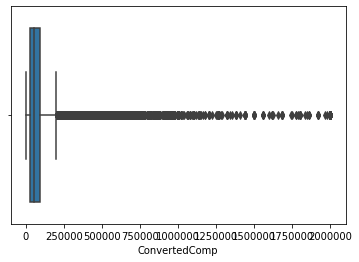

In [17]:
# checking outliers
sns.boxplot(data=salary_all,x=salary_all['ConvertedComp']);

In [18]:
Q1=salary_pro['ConvertedComp'].quantile(0.25)
Q3=salary_pro['ConvertedComp'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Upper_Whisker)

24468.0
95000.0
70532.0
200798.0


**Note** Salary is very highly right-skewed and also we don't know how conscious respondents have answered this question. I decided to group salaries for five categories: quantiles 0-25 (low), 25-75 (mid), 75-95 (high) and 95-100 (very high). This data frame is named salary_pro.

Also, the new data frame for salary was made by reducing the upper whisker. The method for reducing outliers is a common 1.5 x IQR rule. This data frame is named salary_range.

Exploring salary quantiles

In [19]:
salary_pro['ConvertedComp'].quantile(0.05)

5028.0

In [20]:
salary_pro.query('ConvertedComp < 5028')

,Respondent,MainBranch,Country,ConvertedComp,DevType,EdLevel
82,83,I am a developer by profession,Poland,3036.0,"Developer, back-end","Secondary school (e.g. American high school, G..."
122,124,I am a developer by profession,United States,0.0,"Designer;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
320,322,I am a developer by profession,India,4188.0,Data scientist or machine learning specialist;...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
487,489,I am a developer by profession,Kyrgyzstan,312.0,"Developer, full-stack;Developer, game or graphics",I never completed any formal education
550,552,I am a developer by profession,Turkey,575.0,"Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
...,...,...,...,...,...,...
63964,65425,I am a developer by profession,Brazil,1489.0,"Developer, back-end;Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
64023,65487,I am a developer by profession,Brazil,828.0,"Developer, back-end;Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
64111,65584,I am a developer by profession,India,2508.0,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
64121,65595,I am a developer by profession,"Venezuela, Bolivarian Republic of...",369.0,"Database administrator;Developer, back-end;Dev...",Some college/university study without earning ...


In [21]:
salary_pro['ConvertedComp'].quantile(0.98)

911968.3199999939

In [22]:
salary_pro.query('ConvertedComp > 1900000')

,Respondent,MainBranch,Country,ConvertedComp,DevType,EdLevel
121,123,I am a developer by profession,United States,2000000.0,"Developer, back-end;Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
191,193,I am a developer by profession,United States,2000000.0,"Developer, mobile","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
194,196,I am a developer by profession,United States,1920000.0,Academic researcher;Data scientist or machine ...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
663,665,I am a developer by profession,United States,2000000.0,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
982,986,I am a developer by profession,United States,2000000.0,"Database administrator;Designer;Developer, bac...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
...,...,...,...,...,...,...
61417,62660,I am a developer by profession,United States,2000000.0,"Developer, front-end;Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
63459,64874,I am a developer by profession,United States,2000000.0,Data scientist or machine learning specialist;...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
63890,65341,I am a developer by profession,United States,2000000.0,"Designer;Developer, back-end;Developer, deskto...",Some college/university study without earning ...
64035,65502,I am a developer by profession,United States,2000000.0,"Database administrator;Developer, back-end;Dev...","Associate degree (A.A., A.S., etc.)"


In [23]:
salary_pro.loc[64057][4]

'Data scientist or machine learning specialist;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile;Engineer, data;Engineer, site reliability;Engineering manager'

#### Process salary groups

In [24]:
# salary groups for professionals
labels = ['low', "mid", 'high', 'very_high']
salary_pro['Salary_groups'] = pd.qcut(salary_pro['ConvertedComp'], q=[0, 0.25, 0.75, 0.95, 1], labels=labels)


In [25]:
# salary range: no lower bound, upper whisker for professionals
salary_range = salary_pro[salary_pro['ConvertedComp']< Upper_Whisker]

In [26]:
# salary range: groups for professionals
labels = ['low', "mid", 'high']
salary_range['Salary_groups'] = pd.qcut(salary_range['ConvertedComp'], q=[0, 0.25, 0.75, 1], labels=labels)


In [27]:
# setting dataframes for differnet salary groups for further analysis
sal_low = salary_pro.query('Salary_groups == "low"')
sal_mid = salary_pro.query('Salary_groups == "mid"')
sal_high = salary_pro.query('Salary_groups == "high"')
sal_very_high = salary_pro.query('Salary_groups == "very_high"')


In [28]:
# setting dataframes for differnet salary groups for further analysis
sal_low_range = salary_range.query('Salary_groups == "low"')
sal_mid_range = salary_range.query('Salary_groups == "mid"')
sal_high_range = salary_range.query('Salary_groups == "high"')


#### Education level: Exploring and preprocessing

In [29]:
# Education levels: encoding shorter values for plotting
params ={'Bachelor’s degree (B.A., B.S., B.Eng., etc.)':'Bachelor’s degree',
         'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)':'Master’s degree',
         'Some college/university study without earning a degree':'Some college/university',
         'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secondary school',
         'Associate degree (A.A., A.S., etc.)':'Associate degree',
         'Other doctoral degree (Ph.D., Ed.D., etc.)':'Other doctoral degree',
         'Professional degree (JD, MD, etc.)':'Professional degree',
         'I never completed any formal education':'No formal education',
         'Primary/elementary school':'Primary/elementary school'}

salary_pro = salary_pro.replace(params)
salary_range = salary_range.replace(params)
sal_very_high = sal_very_high.replace(params)


## 3. Study Questions

### Question 1. What is the median salary for each developer type?

This was a very interesting question. There were two main observations: Salary skewness and developer type combinations. Firstly, salary distribution is very high right-skewed. Salaries start at 0 and end up at 2 million USD. Different countries have different salary levels and respondents have answered in different ways. For example, there are 313 respondents whose annual incomes are below 1000 USD and 1503 respondents whose annual incomes are below 5000 USD. Also, there are 1570 respondents whose annual incomes are in the range of 260k to 2m USD and 640 respondents whose annual incomes are in the range 900k to 2m USD. Secondly, respondents have given many combinations of developer types, actually, there were 8269 combinations of developer types. 

Salary is measured by variable ConvertedComp. This variable means that salary is converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks. 




In [30]:
# list of developer types
possible_vals = ['Developer, full-stack',
 'Developer, back-end',
 'Developer, front-end',
 'Developer, desktop or enterprise applications',
 'Developer, mobile',
 'DevOps specialist',
 'Database administrator',
 'System administrator',
 'Designer',
 'Developer, embedded applications or devices',
 'Developer, QA or test',
 'Data scientist or machine learning specialist',
 'Data or business analyst',
 'Engineer, data',
 'Academic researcher',
 'Engineering manager',
 'Educator',
 'Developer, game or graphics',
 'Product manager',
 'Engineer, site reliability',
 'Scientist',
 'Senior executive/VP',
 'Marketing or sales professional']

def total_count(df, col1, col2, look_for=None):
    '''
    Parameters:
    ----------------------
    df: the pandas dataframe you want to search
    col1: the column name you want to look through
    col2: the column you want to count values from
    look_for: a list of strings you want to search for in each row of df[col];
    
    Returns:
    ------------------------
    new_df: a dataframe of each look_for with the count of how often it shows up
    '''
    
    from collections import defaultdict
    new_df = defaultdict(int)
    #loop through list of developer type
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df



In [31]:
# split developer types
def split_dev_types(df):
    devtypes = df['DevType'].value_counts().reset_index()
    devtypes.rename(columns={'index': 'DevType', 'DevType' : 'count'}, inplace=True)
    devtypes_df = total_count(devtypes, 'DevType', 'count',possible_vals)
    return devtypes_df
    

In [32]:
salary_all.describe()

,Respondent,ConvertedComp
count,34367.000000,3.436700e+04
mean,29562.026479,1.033452e+05
std,18678.371391,2.266785e+05
min,8.000000,0.000000e+00
25%,13632.000000,2.458050e+04
50%,27384.000000,5.395700e+04
75%,47352.000000,9.500000e+04
max,65631.000000,2.000000e+06


In [33]:
# salary_all: salary_all
split_dev_types(salary_all)

,DevType,count
0,"Developer, full-stack",19664
1,"Developer, back-end",19584
2,"Developer, front-end",12779
3,"Developer, desktop or enterprise applications",8359
4,"Developer, mobile",6306
5,DevOps specialist,4627
6,Database administrator,3982
7,System administrator,3594
8,Designer,3247
9,"Developer, embedded applications or devices",3204


In [34]:
salary_pro.describe()

,Respondent,ConvertedComp
count,31395.000000,3.139500e+04
mean,29421.484727,1.024788e+05
std,18650.016042,2.235872e+05
min,8.000000,0.000000e+00
25%,13518.500000,2.446800e+04
50%,27144.000000,5.400000e+04
75%,47197.500000,9.500000e+04
max,65631.000000,2.000000e+06


In [35]:
# salary_pro: salary_pro filtered:'MainBranch == "I am a developer by profession"'
split_dev_types(salary_pro)

,DevType,count
0,"Developer, full-stack",18981
1,"Developer, back-end",18759
2,"Developer, front-end",12249
3,"Developer, desktop or enterprise applications",7953
4,"Developer, mobile",6113
5,DevOps specialist,4147
6,Database administrator,3520
9,"Developer, embedded applications or devices",3018
7,System administrator,2891
8,Designer,2879


**Note** Salary_pro is a data frame without any limits in upper bound (max ConvertedComp value is 2 million USD).

**Note** Salary range is a data frame, where the upper bound is limited by upper whisker (max ConvertedComp value is 200429$)

In [36]:
salary_range.describe()

,Respondent,ConvertedComp
count,29368.000000,29368.000000
mean,29430.613457,58691.748093
std,18602.142777,44639.665025
min,8.000000,0.000000
25%,13533.750000,22608.000000
50%,27156.000000,49704.000000
75%,47155.250000,84000.000000
max,65631.000000,200429.000000


In [37]:
split_dev_types(salary_range)

,DevType,count
0,"Developer, full-stack",17822
1,"Developer, back-end",17545
2,"Developer, front-end",11540
3,"Developer, desktop or enterprise applications",7443
4,"Developer, mobile",5761
5,DevOps specialist,3856
6,Database administrator,3289
9,"Developer, embedded applications or devices",2783
7,System administrator,2698
8,Designer,2673


In [38]:
df = salary_pro
devtypes = df['DevType'].value_counts().reset_index()
devtypes.rename(columns={'index': 'DevType', 'DevType' : 'count'}, inplace=True)
devtypes_list_df = total_count(devtypes, 'DevType', 'count',possible_vals)

In [39]:
devtypes_list = devtypes_list_df['DevType'].tolist()

In [40]:
def compute_median_salaries(developer_types, df, dev_type_col_name="DevType"):
    '''
    Parameters:
    ----------------------
    developer_types: list of strings for developer types
    df: dataframe to process salaries from
    dev_type_col_name: name of the column holding the developer type
    
    Returns:
    ------------------------
    data frame holding developer types and their average salaries
    '''
    
    median_salaries_dct = {}
    for dt in developer_types:
        median_salaries_dct[dt] = []

    for i in df.index:
        dev_types = df[dev_type_col_name][i].split(";")
        for dt in dev_types:
            dt = dt.strip()
            median_salaries_dct[dt].append(df.ConvertedComp[i])
    
    _median_salaries = {}
    for k, v in median_salaries_dct.items():
        _median_salaries[k] = round(np.median(v))
    
    sorted_median_salaries = [(k, v) for k, v in sorted(_median_salaries.items(), key=lambda item: item[1])]
    
    developer_types_lst = [k for k, v in sorted_median_salaries]
    median_salaries_lst = [v for k, v in sorted_median_salaries]
                                
    median_salaries = pd.DataFrame()
    median_salaries["DevType"] = developer_types_lst
    median_salaries["ConvertedComp"] = median_salaries_lst
    return median_salaries

In [41]:
def display_salary_median(df, title, group, color):
    '''
    Parameters:
    ----------------------
    df: the pandas dataframe you want to search
    title: title for the chart
    group: the salary group we have made before
    color: color to have some variations for charts
    
    Returns:
    ------------------------
    ax: plot a chart with average salaries for each bar 
    '''
    
    respondents_count = len(df)
    
    df_median = compute_median_salaries(devtypes_list,df)
    df_median_sort = df_median.sort_values(by='ConvertedComp', ascending=False)
    plot = df_median_sort.groupby(['DevType']).median()['ConvertedComp'].sort_values()
    ax = plot.plot(kind='barh', figsize=(8,15),color=color, fontsize=14);
    
    ax.set_title(title + '\n Group {}: Respondents = {}'.format(group,respondents_count), fontsize=16)
    
    rects = ax.patches

    # place a label for bars
    for rect in rects:
        # x and y placement of label from rect
        x_value = rect.get_width().round()
        y_value = rect.get_y() + rect.get_height() / 2

        # number of points between bar and label
        space = 5
        # vertical alignment
        ha = 'left'

        # x value as label and format number
        label = '{:.0f}00'.format(x_value/100)

        # annotation
        plt.annotate(
            label,                     
            (x_value, y_value),         
            xytext=(space, 0),         
            textcoords='offset points', 
            va='center',
            fontsize = 14,
            color = 'dimgrey',
            ha=ha)                      
                                        
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    
    ax.axes.get_xaxis().set_visible(False)
    
    ax.set_ylabel(None)
    #ax.figure.savefig(title.png)
    #ax.savefig(title.png);
    

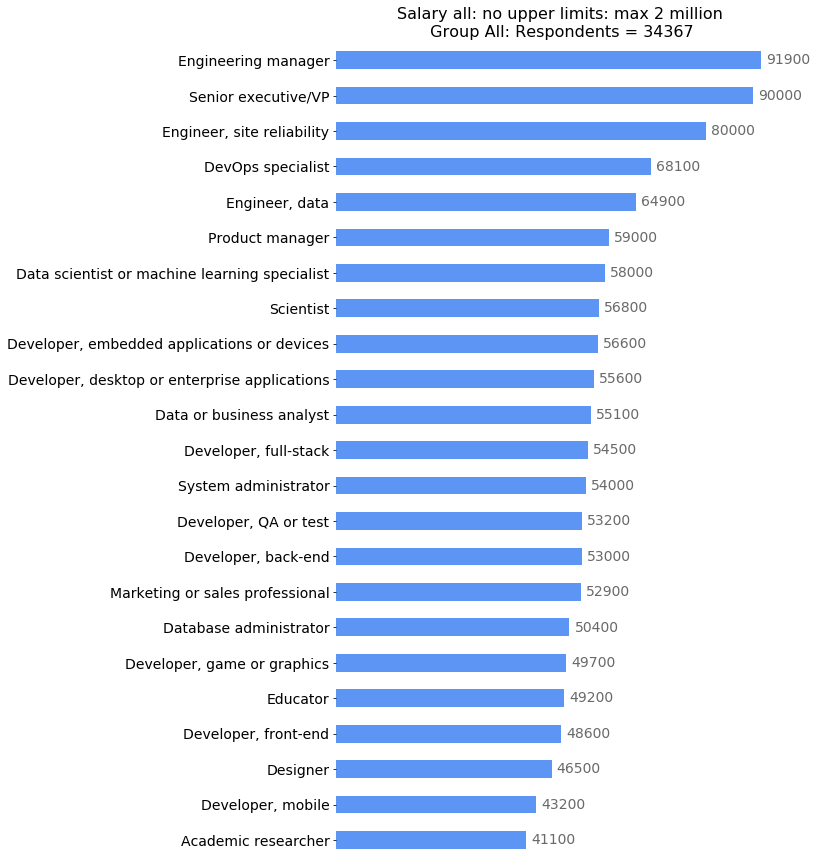

In [66]:
# salary all is similar as Stack Overflow website chart: https://insights.stackoverflow.com/survey/2020#salary
display_salary_median(salary_all, 'Salary all: no upper limits: max 2 million', 'All','#5d95f5')
plt.savefig('Salary_all.png', dpi=72, bbox_inches='tight')
fig

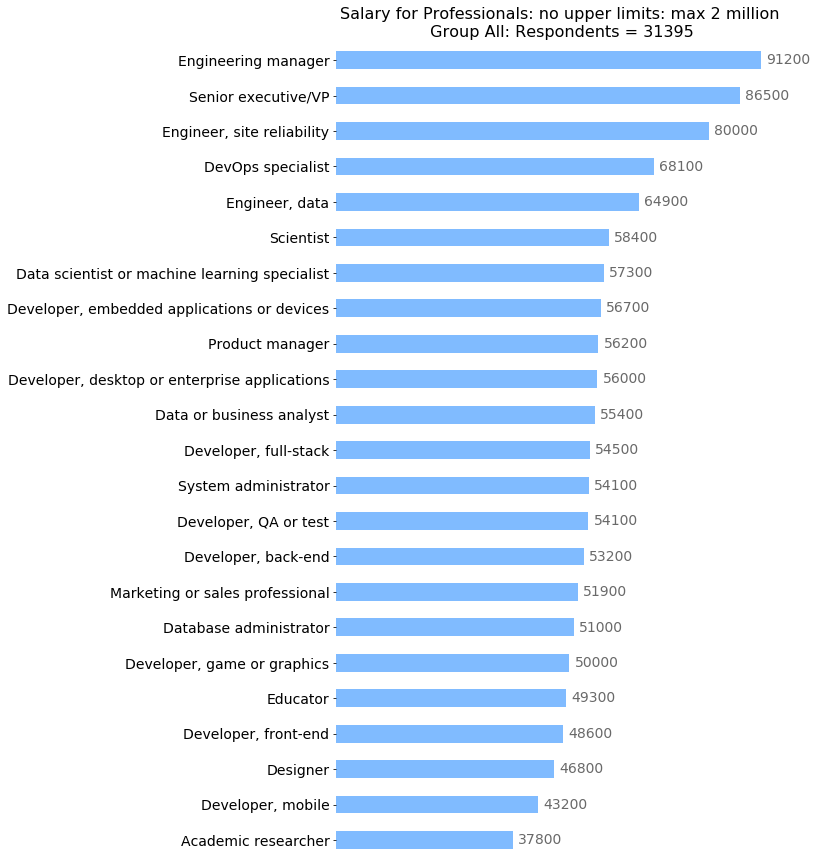

In [43]:
display_salary_median(salary_pro, 'Salary for Professionals: no upper limits: max 2 million', 'All','#80bbff')
plt.savefig('Salary_pro.png', dpi=72, bbox_inches='tight')
fig

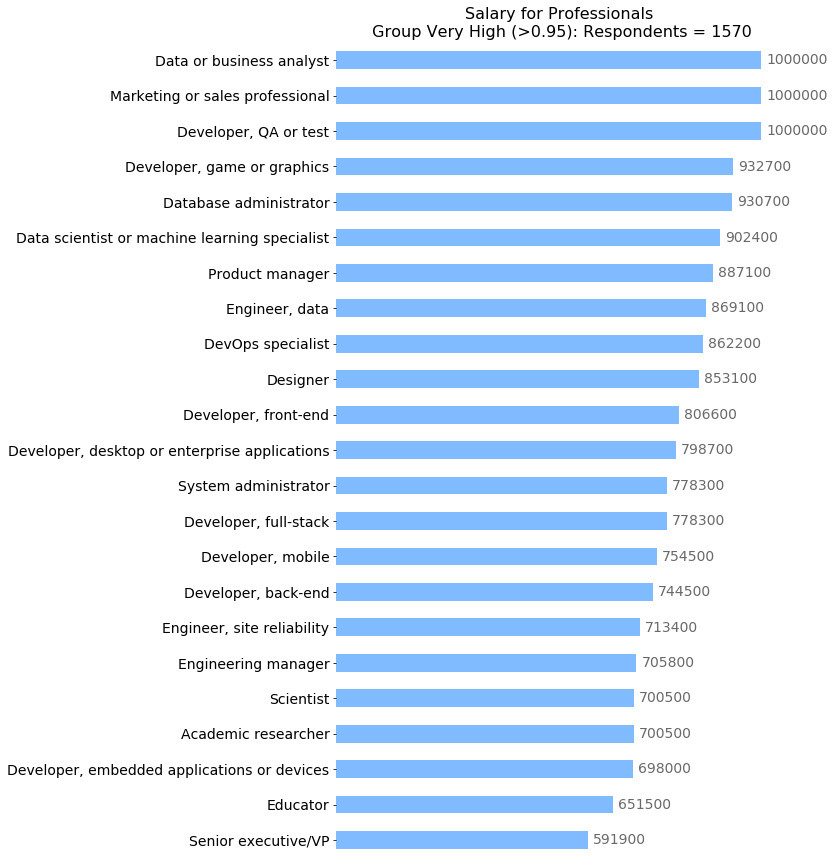

In [44]:
display_salary_median(sal_very_high, 'Salary for Professionals','Very High (>0.95)', '#80bbff')
plt.savefig('Salary_very_high.png', dpi=72, bbox_inches='tight')
fig

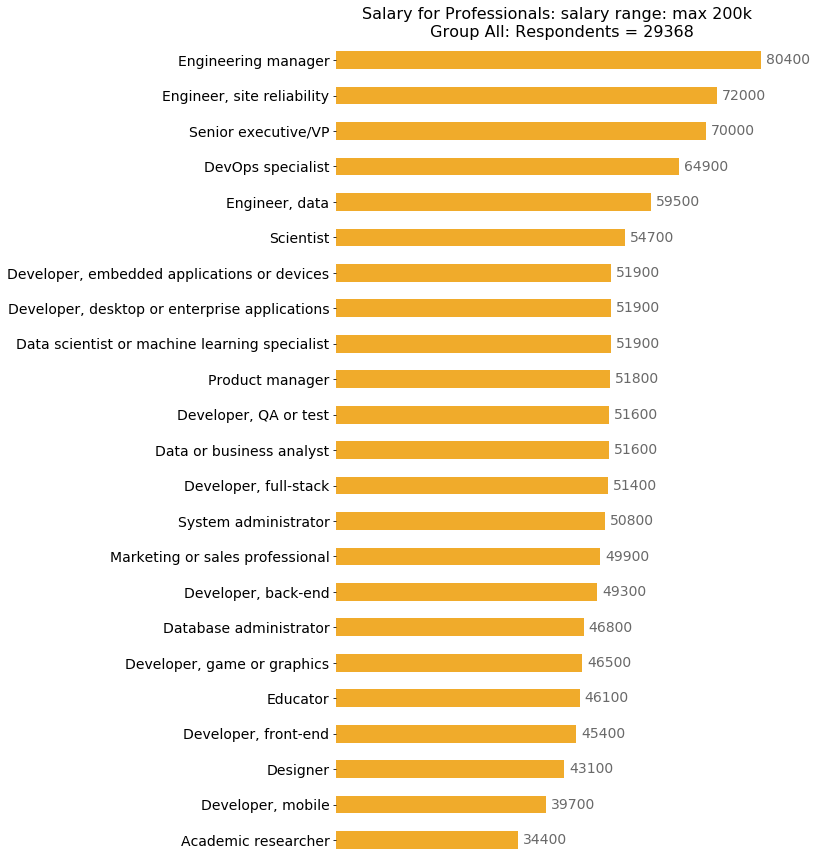

In [45]:
display_salary_median(salary_range, 'Salary for Professionals: salary range: max 200k ', 'All','#f0ab2b')
plt.savefig('Salary_range.png', dpi=72, bbox_inches='tight')
fig

Checking some developer type and how they are seen as a single value

In [46]:
# this dev type is nro 22 with 651 counts
salary_pro[salary_pro['DevType'].isin(['Senior executive/VP'])].count()

Respondent       24
MainBranch       24
Country          24
ConvertedComp    24
DevType          24
EdLevel          24
Salary_groups    24
dtype: int64

In [47]:
# this dev type is nro 23 with 224 counts
salary_pro[salary_pro['DevType'].isin(['Marketing or sales professional'])].count()

Respondent       0
MainBranch       0
Country          0
ConvertedComp    0
DevType          0
EdLevel          0
Salary_groups    0
dtype: int64

In [48]:
# this dev type is nro 1 with 18981 counts
salary_pro[salary_pro['DevType'].isin(['Developer, full-stack'])].count()

Respondent       3120
MainBranch       3120
Country          3120
ConvertedComp    3120
DevType          3120
EdLevel          3073
Salary_groups    3120
dtype: int64

In [49]:
# this dev type is nro 2 with 18759 counts
salary_pro[salary_pro['DevType'].isin(['Developer, back-end'])].count()

Respondent       2179
MainBranch       2179
Country          2179
ConvertedComp    2179
DevType          2179
EdLevel          2141
Salary_groups    2179
dtype: int64

In [50]:
# dev types from original dataset where respondents have answered a single value 
# e.g. one dev type from 23 categories
dev_types = df['DevType'].str.split(";")
count = sum(map(lambda x : len(x)<2, dev_types))
print('{} respondents who have answered a single value as a developer type.'.format(count))

8479 respondents who have answered a single value as a developer type.


In [51]:
# combinations of dev types from original dataset where respondents have answered a multiple value 
count = sum(map(lambda x : len(x) > 1, dev_types))
print('{} respondents who have answered a combination value as a developer type.'.format(count))

22916 respondents who have answered a combination value as a developer type.


From charts and tables above we can make some conclusions. Firstly, salaries for different developer types are very hard to identify because of respondents' multiple-choice answers. So how can you exactly tell, which salary is meant for each developer type? One respondent, whose annual incomes are 2 million, answer for developer type is: Data scientist or machine learning specialist;Designer;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, mobile;Engineer, data;Engineer, site reliability;Engineering manager.


Secondly, average salaries depend on boundaries we have set. If we don’t set any lower or upper boundaries, we will get different types of charts as we have seen above. For example in professionals salary data, there are 651 Senior executive/VP’s and 24 of them are without combinations. Also there are 224 Marketing or sales professionals and all of them are in combinations with other developer types. These two types are also related to the highest salary category which we can see in salary groups. If we set upper bound for upper whisker (salary range chart, max 200k) we can see a different Top 5.  

Thirdly, different countries have different salary levels based on their gross domestic product. For this case, we could make normalization e.g. logarithmic transformations and/or relate this to countries GDP. This is another analysis to do. 



### Question 2. How does education compare to median salary?

In [63]:
def display_edu_chart(df, column, title ,color):
    from matplotlib.ticker import StrMethodFormatter
    
    '''
    Parameters:
    ----------------------
    df: the pandas dataframe you want to search
    column: the column name you want to look through
    title: title for the chart
    color: color to have some variations for charts
    
    Returns:
    ------------------------
    ax: plot a chart with percentages for each bar 
    '''
    # number of respondents for this spesific colum
    respondents_count = df[column].value_counts().sum()
    # split column values
    ax = df[column].str.split(';', expand=True).stack().value_counts().plot(kind='barh', figsize=(8,5),
                                        color=color, fontsize=12);

    ax.set_title(title, fontsize=16)
    

    # bar lables
    for i in ax.patches:   
        ax.text(i.get_width()+10, i.get_y()+.38, \
            str(round((i.get_width()/respondents_count)*100, 1))+'%', fontsize=14,color='dimgrey')
    
    # largest on top 
    ax.invert_yaxis()

    # vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#999999', zorder=1)


    # x-axis label
    ax.set_xlabel('Respondents = {}, multiple-choice question'.format(respondents_count), labelpad=20, size=12);

    # y-axis label
    #ax.set_ylabel('Percentage of {}'.format(ylabel),labelpad=20, weight='bold', size=12);
    ax.set_ylabel(None)

    # Format x-axis label
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [53]:
def display_edu_sal_median(df, title, group, color):
    
    '''
    Parameters:
    ----------------------
    df: the pandas dataframe you want to search
    title: title for the chart
    group: the salary group we have made before
    color: color to have some variations for charts
    
    Returns:
    ------------------------
    ax: plot a chart with average salaries for each bar 
    '''
    
    respondents_count = len(df)
    
    sal_by_edu = df.groupby(['EdLevel'])['ConvertedComp'].median()
    sal_by_edu = sal_by_edu.sort_values(ascending=False)
    
    ax = sal_by_edu.plot(kind='barh', figsize=(8,5),color=color, fontsize=14);
    
    ax.set_title(title + '\n Group {}: Respondents = {}'.format(group,respondents_count), fontsize=16)
    
    rects = ax.patches

    # place a label for bars
    for rect in rects:
        # x and y placement of label from rect
        x_value = rect.get_width().round()
        y_value = rect.get_y() + rect.get_height() / 2

        # number of points between bar and label
        space = 5
        # vertical alignment
        ha = 'left'

        # x value as label and format number
        label = '{:.0f}00'.format(x_value/100)

        # annotation
        plt.annotate(
            label,                     
            (x_value, y_value),         
            xytext=(space, 0),         
            textcoords='offset points', 
            va='center',
            fontsize = 14,
            color = 'dimgrey',
            ha=ha)                      
                                      
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    
    ax.invert_yaxis()
    ax.axes.get_xaxis().set_visible(False)
    ax.set_ylabel(None);
    

In [54]:
salary_pro_edu_df = pd.DataFrame(salary_pro['EdLevel'].value_counts())
salary_pro_edu_df

,EdLevel
Bachelor’s degree,15610
Master’s degree,7749
Some college/university,3707
Secondary school,1334
Associate degree,1058
Other doctoral degree,761
Professional degree,412
No formal education,138
Primary/elementary school,132


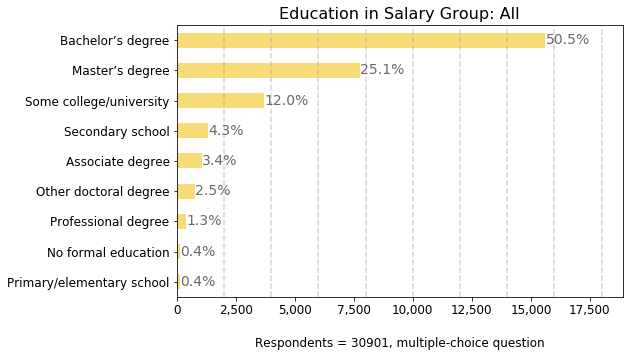

In [55]:
display_edu_chart(salary_pro, 'EdLevel', 'Education in Salary Group: All','#f7db77')

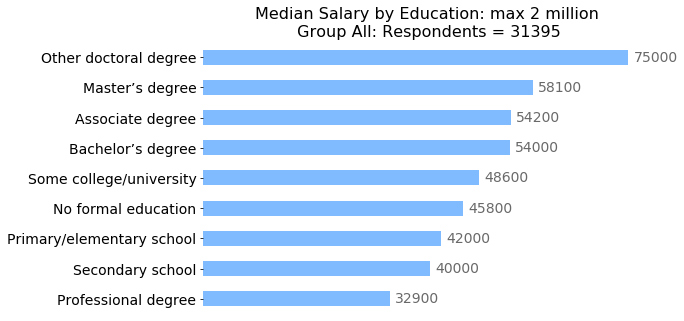

In [74]:
display_edu_sal_median(salary_pro, 'Median Salary by Education: max 2 million', 'All','#80bbff')
plt.savefig('sal_median__edu_all.png', dpi=72, bbox_inches='tight')
fig

In [57]:
salary_range_edu_df = pd.DataFrame(salary_range['EdLevel'].value_counts())
salary_range_edu_df

,EdLevel
Bachelor’s degree,14585
Master’s degree,7235
Some college/university,3487
Secondary school,1268
Associate degree,1009
Other doctoral degree,681
Professional degree,387
No formal education,129
Primary/elementary school,122


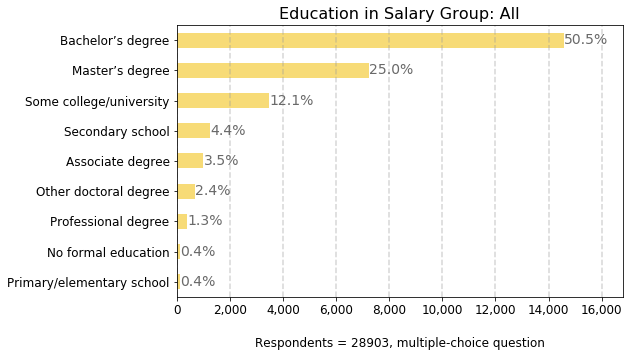

In [58]:
display_edu_chart(salary_range, 'EdLevel', 'Education in Salary Group: All','#f7db77')

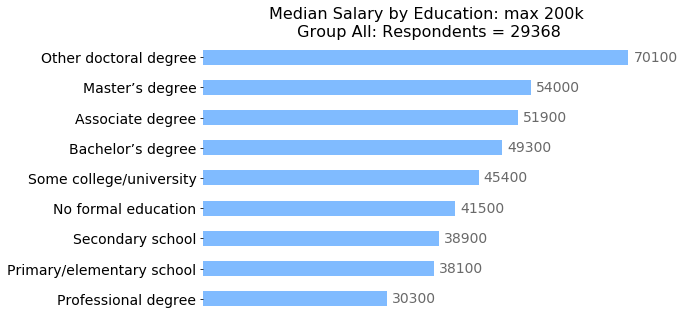

In [75]:
display_edu_sal_median(salary_range, 'Median Salary by Education: max 200k', 'All','#80bbff')
plt.savefig('sal_median_edu_range.png', dpi=72, bbox_inches='tight')
fig

In [60]:
sal_very_high_edu_df = pd.DataFrame(sal_very_high['EdLevel'].value_counts())
sal_very_high_edu_df

,EdLevel
Bachelor’s degree,804
Master’s degree,402
Some college/university,168
Other doctoral degree,50
Secondary school,48
Associate degree,41
Professional degree,19
Primary/elementary school,9
No formal education,7


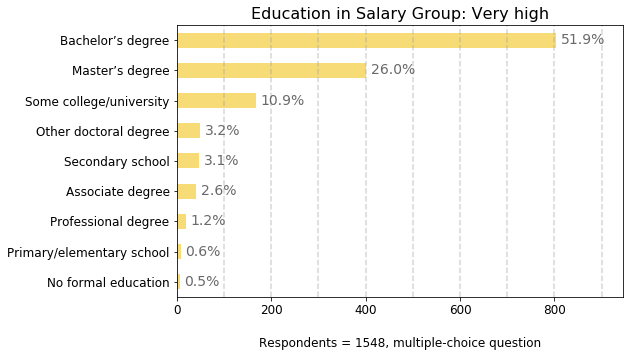

In [61]:
display_edu_chart(sal_very_high, 'EdLevel', 'Education in Salary Group: Very high','#f7db77')

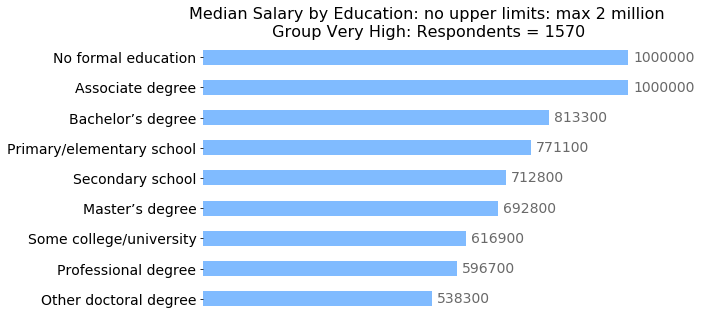

In [76]:
display_edu_sal_median(sal_very_high, 'Median Salary by Education: no upper limits: max 2 million', 'Very High','#80bbff')
plt.savefig('sal_median_edu_very_high.png', dpi=72, bbox_inches='tight')
fig

When we are exploring median salaries by education, we have three salary data frames: salary_pro without upper bound (max value 2m USD), salary_range with upper bound (max value 200k), and salary group very high (range 263k to 2m USD). 

In the first chart where we have no upper bound, we can notice Top 5: Other doctoral degree (resp. 761, median 75k), Master’s degree (resp. 7749, median 58k), Associate degree (resp. 1058, median 54k), Bachelor’s degree (resp. 15610, median 54k) and Some college/university (resp. 3707 , median 49k)

In the second chart, we have an upper bound 200K and we can notice another order in Top 5: Other doctoral degree (resp. 681, median 70k), Master’s degree (resp. 7235, median 54k), Associate degree (resp. 1009, median 52k), Bachelor’s degree (resp. 14585, median 49k) and Some college/university (resp. 3487 , median 45k)

In the third chart, we have the highest salary group and there we can notice the third order in Top 5: No formal education (resp.7, median 1m), Associate degree (resp. 41, median 1m), Bachelor’s degree (resp. 804, median 813k), Primary/elementary school (resp. 9, median 771k) and Secondary school (resp. 48, median 713k), 

So we have three different charts and which one is to be believed? If your education is Other doctoral degree you will have a good chance to be a well-paid employer. Also, it was seen that without any higher or formal education you can also achieve a well-paid job, if we can rely on this data. 



### Question 3. How does education compare to average salary?

In [67]:
def display_edu_sal_avg(df, title, group, color):
    
    '''
    Parameters:
    ----------------------
    df: the pandas dataframe you want to search
    title: title for the chart
    group: the salary group we have made before
    color: color to have some variations for charts
    
    Returns:
    ------------------------
    ax: plot a chart with average salaries for each bar 
    '''
    
    respondents_count = len(df)
    
    sal_by_edu = df.groupby(['EdLevel'])['ConvertedComp'].mean()
    sal_by_edu = sal_by_edu.sort_values(ascending=False)
    
    ax = sal_by_edu.plot(kind='barh', figsize=(8,5),color=color, fontsize=14);
    
    ax.set_title(title + '\n Group {}: Respondents = {}'.format(group,respondents_count), fontsize=16)
    
    rects = ax.patches

    # place a label for bars
    for rect in rects:
        # x and y placement of label from rect
        x_value = rect.get_width().round()
        y_value = rect.get_y() + rect.get_height() / 2

        # number of points between bar and label
        space = 5
        # vertical alignment
        ha = 'left'

        # x value as label and format number
        label = '{:.0f}00'.format(x_value/100)

        # annotation
        plt.annotate(
            label,                     
            (x_value, y_value),         
            xytext=(space, 0),         
            textcoords='offset points', 
            va='center',
            fontsize = 14,
            color = 'dimgrey',
            ha=ha)                      
                                      
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    
    ax.invert_yaxis()
    ax.axes.get_xaxis().set_visible(False)
    ax.set_ylabel(None);
    

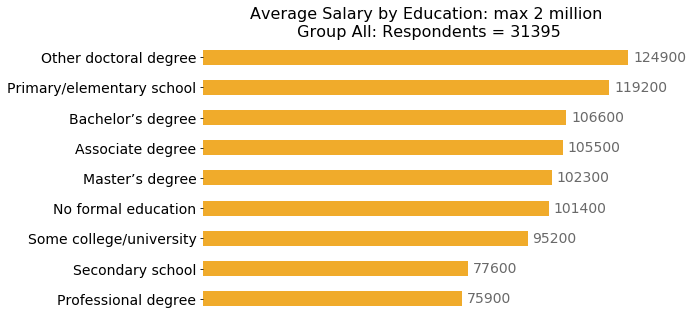

In [77]:
display_edu_sal_avg(salary_pro, 'Average Salary by Education: max 2 million', 'All','#f0ab2b')
plt.savefig('sal_avg_edu_avg_all.png', dpi=72, bbox_inches='tight')
fig

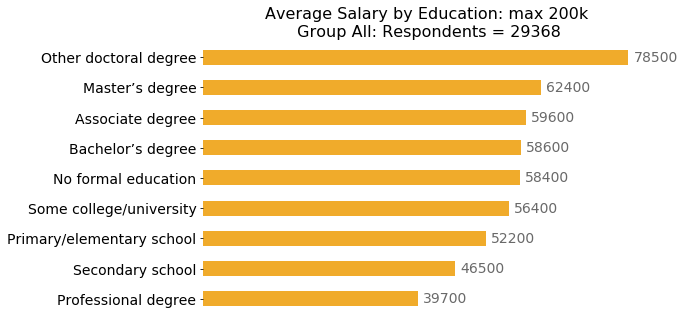

In [78]:
display_edu_sal_avg(salary_range, 'Average Salary by Education: max 200k', 'All','#f0ab2b')
plt.savefig('sal_avg_edu_avg_range.png', dpi=72, bbox_inches='tight')
fig

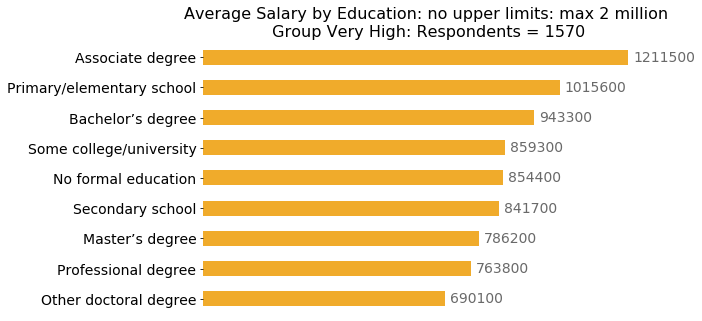

In [79]:
display_edu_sal_avg(sal_very_high, 'Average Salary by Education: no upper limits: max 2 million', 'Very High','#f0ab2b')
plt.savefig('sal_avg_edu_avg_very_high.png', dpi=72, bbox_inches='tight')
fig

When we are exploring average salaries by education, we have three salary data frames: salary_pro without upper bound (max value 2m USD), salary_range with upper bound (max value 200k), and salary group very high (range 263k to 2m USD). 

In the first chart where we have no upper bound, we can notice Top 5: Other doctoral degree (resp. 761, avg 125k), Primary/elementary school (resp.132, avg 120k), Bachelor’s degree (resp. 15610, avg 107k), Associate degree (resp. 1058, avg 106k) and Master’s degree (resp. 7749, avg 102k)

In the second chart, we have an upper bound 200K and we can notice another order in Top 5: Other doctoral degree (resp. 681, avg 79k), Master’s degree (resp. 7235, avg 62k), Associate degree (resp. 1009, avg 60k), Bachelor’s degree (resp. 14585, avg 59k) and No formal education (resp.129, avg 58k)

In the third chart, we have the highest salary group and there we can notice the third order in Top 5: Associate degree (resp. 41, avg 1.2m), Primary/elementary school (resp. 9, avg 1m), Bachelor’s degree (resp. 804, avg 943k), Some college/university (resp. 168, avg 859k), No formal education (resp.7, avg 854k)

So we have three different charts and which one is to be believed? If your education is Bachelor’s degree you will have a good chance to be a well-paid employer. Also, it was seen that without any higher or formal education you can also achieve a well-paid job, if we can rely on this data. 






## 4. Conclusions


Survey questions can be quite tricky to analyze. The more time you spend with data more deeply you’ll dive in. In this dataset, you can find so many ways to make better analyses. 


Salaries for different developer types are very hard to identify because of respondents' multiple-choice answers and it is hard to tell, which salary is meant for each developer type. Average salaries depend on the boundaries we have set. If we don’t set any lower or upper boundaries, we will get different types of charts as we have seen above. Also different countries have different salary levels based on their gross domestic product. In this case, we could have other methods to analyze and this is another story.

When we were comparing education to salary we noticed the same thing with salary data. For median salaries: If your education is Other doctoral degree you will have a good chance to be a well-paid employer. For average salaries: If your education is Bachelor’s degree you will have a good chance to be a well-paid employer. Also, it was seen that without any higher or formal education you can also achieve a well-paid job if we can rely on this data.


In this study we had four different median salary charts, three different education by median salary charts, and three different education by average salary charts. Which one is to be believed?


Overall Stack Overflows public survey is a good material for data scientists to examine and practice highly needed skills. 
